In [1]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns


In [3]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
# !pip install librosa
import librosa
import librosa.display
import seaborn as sns
# import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
# import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf 
print ("Done")

Done


# Importing Data 

                                              Ravdess Dataframe
Here is the filename identifiers as per the official RAVDESS website:

* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

* Speech (01)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12) - Female (as the actor ID number is even)

In [4]:
#preparing data set

ravdess = "E:/web/New folder/ATM/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


# preprocessing

In [5]:
file_emotion = []
file_path = []
# هذا اللوب يقرا المجلدات فقط 
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor
#     print(i) 
    actor = os.listdir(ravdess + i)
    for f in actor:# يقرا الملفات الصوتية التي داخل المجلد
        part = f.split('.')[0].split('-')
#         print(f)
#         print(part)
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)
#
    

In [6]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

#يتم دمج التعبير والباث في داتا فريم وحدة
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',
                             8:'Surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())




  Emotions                                               Path
0  Neutral  E:/web/New folder/ATM/audio_speech_actors_01-2...
1  Neutral  E:/web/New folder/ATM/audio_speech_actors_01-2...
2  Neutral  E:/web/New folder/ATM/audio_speech_actors_01-2...
3  Neutral  E:/web/New folder/ATM/audio_speech_actors_01-2...
4     Calm  E:/web/New folder/ATM/audio_speech_actors_01-2...
______________________________________________
      Emotions                                               Path
1435  Surprise  E:/web/New folder/ATM/audio_speech_actors_01-2...
1436  Surprise  E:/web/New folder/ATM/audio_speech_actors_01-2...
1437  Surprise  E:/web/New folder/ATM/audio_speech_actors_01-2...
1438  Surprise  E:/web/New folder/ATM/audio_speech_actors_01-2...
1439  Surprise  E:/web/New folder/ATM/audio_speech_actors_01-2...
_______________________________________________
Calm        192
Happy       192
Sad         192
Angry       192
Fear        192
Disgust     192
Surprise    192
Neutral      96
Name: Emo

# Data Visualisation and Exploration

In [7]:
# !pip install --upgrade --force-reinstall matplotlib

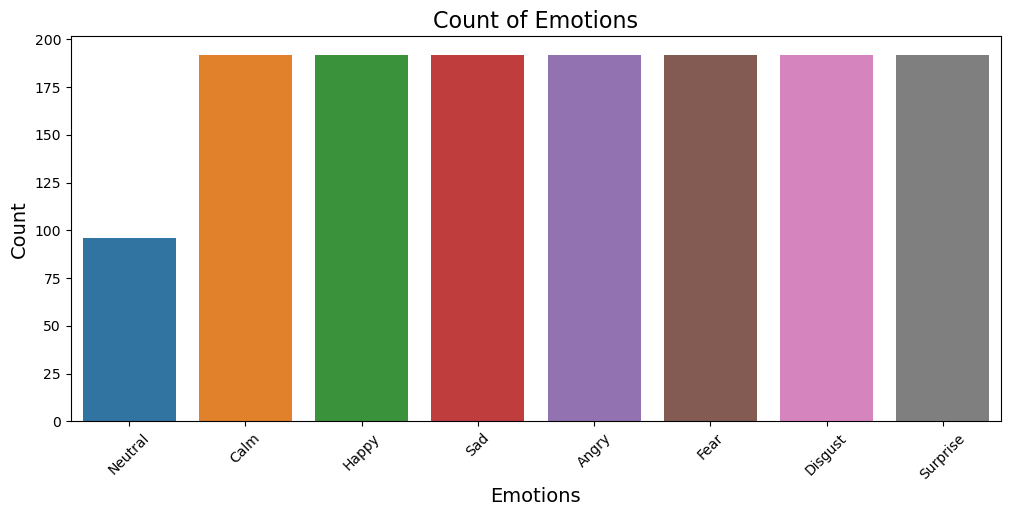

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(x=ravdess_df.Emotions)
plt.ylabel('Count', size=14)
plt.xlabel('Emotions', size=14)
plt.xticks(rotation=45)
plt.show()

In [9]:
#it is Hz represents the number of cycles per second 
#data is waveform for each word 
data,sr = librosa.load(file_path[0])
sr

22050

In [10]:
ipd.Audio(data,rate=sr)

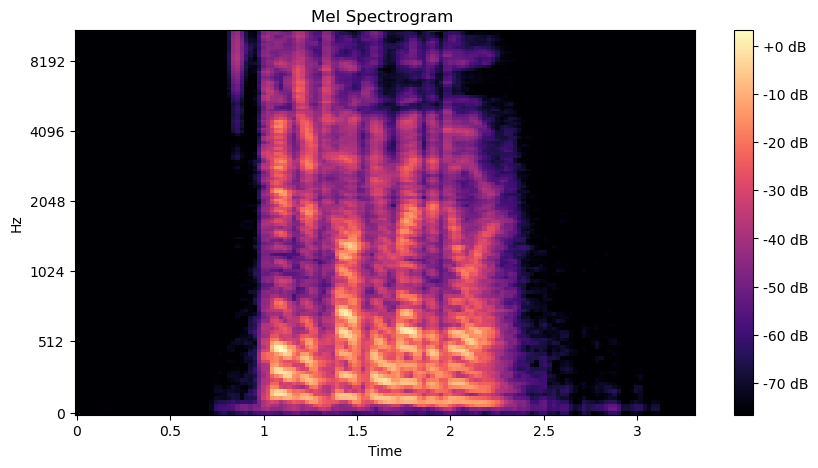

In [11]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

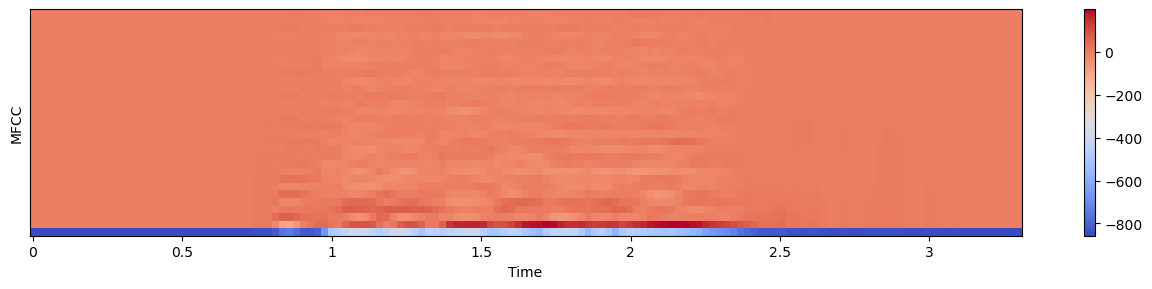

In [12]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data augmentation

In [13]:
# NOISE

def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH 0.75%
def time_stretch(data):
    return librosa.effects.time.stretch(data,rate=0.8)
#يخلي الصوت بطي بنسبه معينه 
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
# SHIFT
#يقلل الثواني تقريبا او التردد 
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data,sampling_rate,pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)




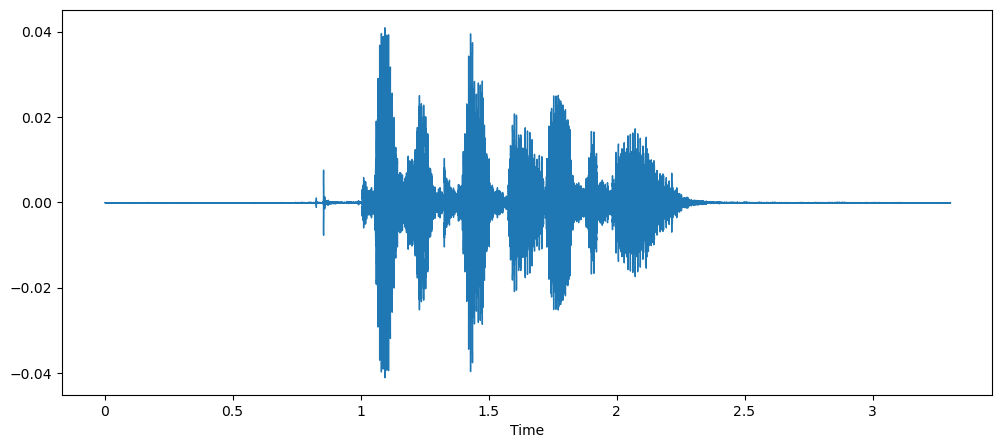

In [14]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

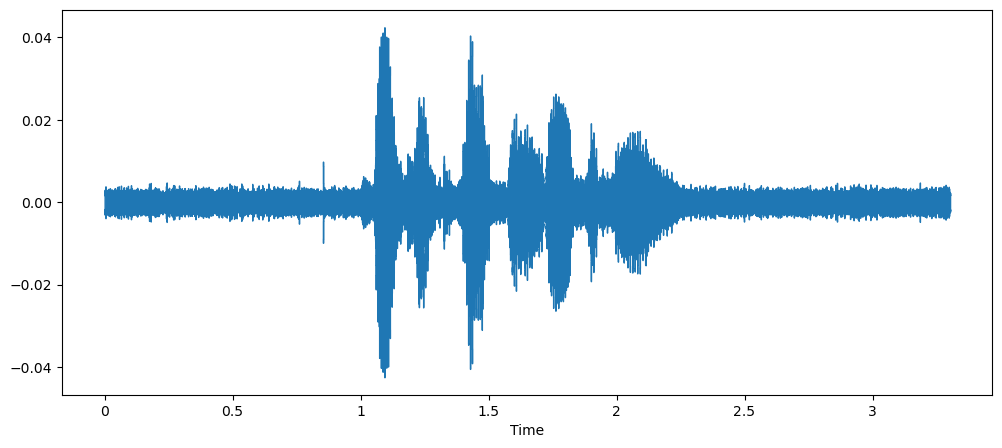

In [15]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

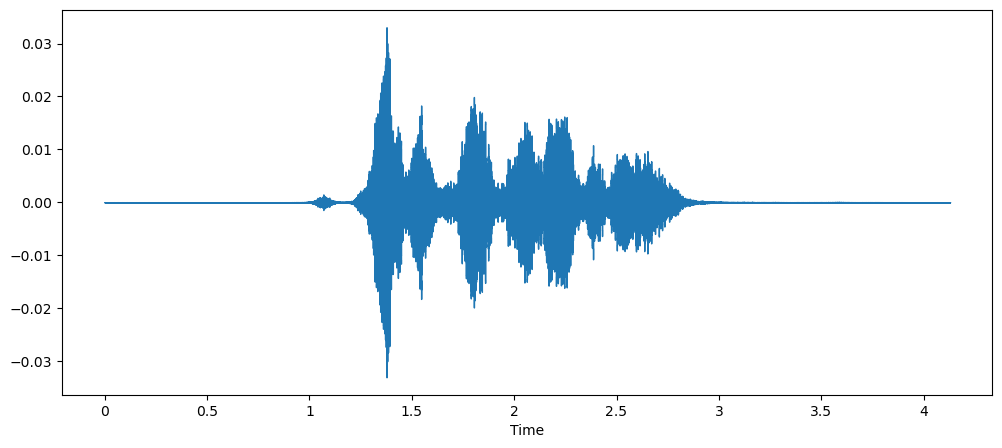

In [16]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

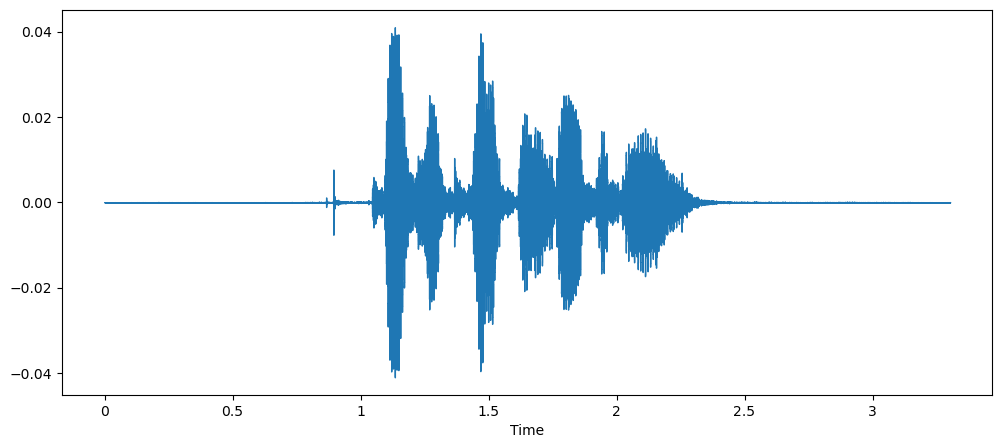

In [17]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

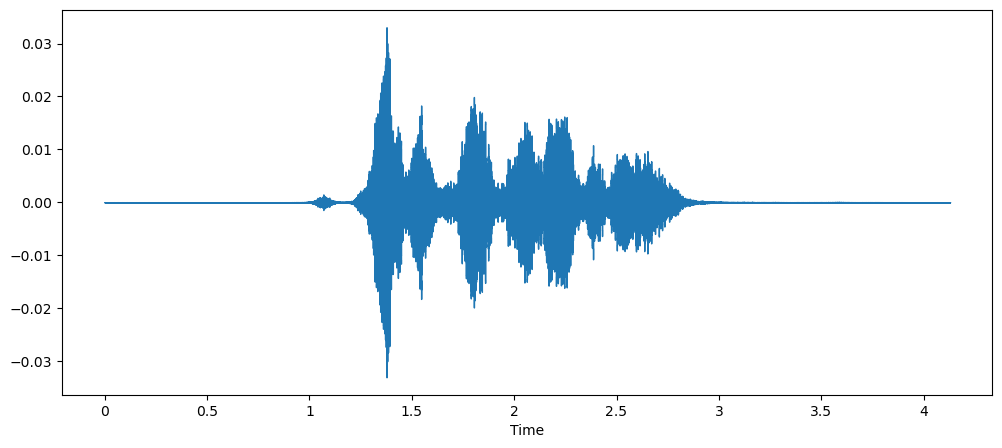

In [18]:
# AUDIO WITH PITCH
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

# Feature extraction

In [22]:
#يتم استخدام هذي الدالة لاستخراج سمات الصوت ونقدر نحدد نوع الكلام ، والتصنيف  
def feat_ext(data):
    #Time_domain_features
    # ZCR Persody features or Low level ascoustic features
    result = np.array([])
    #استخراج اشارة الصوت لكل اطار زمني  وياخذ المتوسط الحسابي حقه 
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally
    #Frequency_domain_features
    #Spectral and wavelet Features
    #MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr,n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally
    return result

def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext(data_stretch_pitch)
    result = np.vstack((result, res3))
    return result






# Faster way to get features
***Parallel way***



In [23]:
from joblib import Parallel, delayed
import numpy as np
import timeit
start = timeit.default_timer()
# Define a function to get features for a single audio file
def get_features(path, emotion):
    feature = get_feat(path)
    X, Y = [], []
    for ele in feature:
        X.append(ele)
        Y.append(emotion)
    return X, Y

# Call the get_features function in parallel for all audio files
X, Y = [], []
results = Parallel(n_jobs=-1)(delayed(get_features)(path, emotion) for path, emotion in zip(ravdess_df['Path'], ravdess_df['Emotions']))
for result in results:
    X.extend(result[0])
    Y.extend(result[1])
stop = timeit.default_timer()

print('Time: ', stop - start) 


Time:  54.49854080000114


# Saving features

In [24]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('new_emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,Emotions
0,0.321275,-645.880737,72.619637,0.841305,16.399446,10.241591,0.653901,-4.328002,-4.258932,-14.575824,...,-2.780704,-3.576632,-2.455497,-4.275354,-2.060977,-1.432523,-2.322279,-4.633035,-2.025275,Neutral
1,0.313002,-454.292271,32.403615,8.107328,9.363628,5.241458,-0.971844,-4.070992,-6.862965,-9.173454,...,-1.851092,-1.624442,-2.404265,-2.860828,-2.002476,-0.830703,-1.642651,-2.451046,-2.282015,Neutral
2,0.188256,-712.554077,70.982635,-0.730857,16.815681,7.990951,-0.821937,-6.391303,-6.146917,-15.975416,...,-3.186986,-4.714000,-2.983167,-4.735821,-1.700080,-3.374393,-5.187478,-3.506788,-3.644433,Neutral
3,0.293566,-634.663269,72.324066,-2.998578,20.209740,10.674217,-1.151011,-2.813592,-7.923956,-16.231958,...,-3.665341,-2.948025,-3.360369,-4.123194,-1.116632,-1.728049,-4.136899,-4.284536,-3.083479,Neutral
4,0.332732,-406.890240,23.390025,9.164143,8.959059,4.847739,-0.230572,-1.674316,-5.659769,-7.213007,...,-1.624268,-1.962739,-2.126089,-2.413440,-1.668513,-1.253480,-2.376675,-2.835990,-2.412176,Neutral


In [21]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,Emotions
0,0.321275,-645.880737,72.619637,0.841305,16.399446,10.241591,0.653901,-4.328002,-4.258932,-14.575824,...,-2.780704,-3.576632,-2.455497,-4.275354,-2.060977,-1.432523,-2.322279,-4.633035,-2.025275,Neutral
1,0.274920,-569.276561,57.200103,2.062956,12.911286,7.696508,-0.526755,-4.283055,-6.310898,-13.546721,...,-3.337719,-3.305616,-2.768378,-3.773933,-2.948105,-1.495737,-2.385942,-3.862545,-2.174215,Neutral
2,0.188256,-712.554077,70.982635,-0.730857,16.815681,7.990951,-0.821937,-6.391303,-6.146917,-15.975416,...,-3.186986,-4.714000,-2.983167,-4.735821,-1.700080,-3.374393,-5.187478,-3.506788,-3.644433,Neutral
3,0.293566,-634.663269,72.324066,-2.998578,20.209740,10.674217,-1.151011,-2.813592,-7.923956,-16.231958,...,-3.665341,-2.948025,-3.360369,-4.123194,-1.116632,-1.728049,-4.136899,-4.284536,-3.083479,Neutral
4,0.279722,-513.762213,44.069031,5.557371,14.283927,6.513965,-2.430263,-3.403511,-8.122770,-11.912174,...,-2.468668,-2.001988,-3.205982,-3.597368,-2.242823,-2.113148,-3.947176,-3.254367,-2.243152,Neutral


# Data preparation

In [25]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions

X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

array(['Neutral', 'Neutral', 'Neutral', ..., 'Surprise', 'Surprise',
       'Surprise'], dtype=object)

In [26]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [27]:
print(Y.shape)
X.shape

(4320, 8)


(4320, 41)

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 41), (3240, 8), (1080, 41), (1080, 8))

In [29]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [30]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 41), (3240, 8), (1080, 41), (1080, 8))

In [31]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [32]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,mode='auto')
es=EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

# LSTM Model

In [33]:
model01=Sequential()
model01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
model01.add(Dropout(0.2))
model01.add(LSTM(128))
model01.add(Dropout(0.2))
model01.add(Dense(8,activation = 'softmax'))
model01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 41, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 41, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 41, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 41, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 41, 128)           131584    
                                                                 
 dropout_2 (Dropout)         (None, 41, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 41, 128)           1

In [32]:
hist=model01.fit(X_train, y_train,
            epochs=100,
            validation_data=(X_test, y_test),batch_size=65,
            verbose=1)

Epoch 1/100
50/50 [==============================] - 14s 70ms/step - loss: 1.9818 - accuracy: 0.1969 - val_loss: 1.9178 - val_accuracy: 0.2556
Epoch 2/100
50/50 [==============================] - 1s 25ms/step - loss: 1.9135 - accuracy: 0.2500 - val_loss: 1.8306 - val_accuracy: 0.2926
Epoch 3/100
50/50 [==============================] - 1s 25ms/step - loss: 1.8360 - accuracy: 0.2877 - val_loss: 1.8484 - val_accuracy: 0.2972
Epoch 4/100
50/50 [==============================] - 1s 25ms/step - loss: 1.8283 - accuracy: 0.2972 - val_loss: 1.7683 - val_accuracy: 0.3194
Epoch 5/100
50/50 [==============================] - 1s 25ms/step - loss: 1.7557 - accuracy: 0.3312 - val_loss: 1.6764 - val_accuracy: 0.3657
Epoch 6/100
50/50 [==============================] - 1s 26ms/step - loss: 1.7474 - accuracy: 0.3333 - val_loss: 1.7196 - val_accuracy: 0.3546
Epoch 7/100
50/50 [==============================] - 1s 25ms/step - loss: 1.7044 - accuracy: 0.3586 - val_loss: 1.7294 - val_accuracy: 0.3157
Epoch

34/34 [==============================] - 6s 48ms/step - loss: 2.0788 - accuracy: 0.1231
Accuracy of our model on test data :  12.314815074205399 %


NameError: name 'hist' is not defined

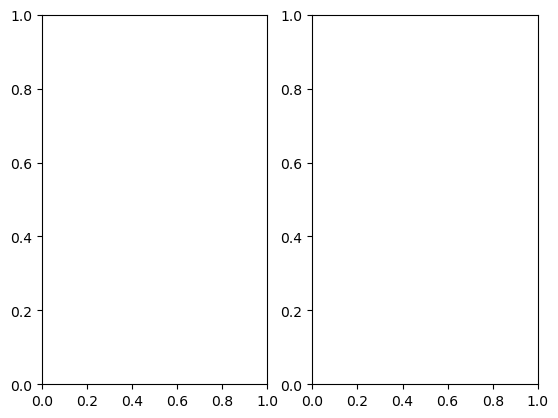

In [33]:
print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# CNN model

In [36]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((3240, 41, 1), (3240, 8), (1080, 41, 1), (1080, 8))

In [37]:
#CNN


model = Sequential()
model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(LSTM(256, return_sequences=True))

model.add(LSTM(128))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='softmax'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 41, 2048)          12288     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 21, 2048)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 21, 2048)         8192      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 21, 1024)          10486784  
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 11, 1024)         0         
 1D)                                                             
                                                      

In [38]:
# from keras.utils.vis_utils import plot_model
# plot_model( model, show_shapes=True, show_layer_names=True, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [37]:
#CNN
history =  model.fit(x_traincnn, y_train, batch_size=64, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
51/51 [==============================] - 11s 51ms/step - loss: 2.0518 - accuracy: 0.1778 - val_loss: 2.0982 - val_accuracy: 0.1213
Epoch 2/100
51/51 [==============================] - 2s 35ms/step - loss: 1.9723 - accuracy: 0.2327 - val_loss: 2.1236 - val_accuracy: 0.1213
Epoch 3/100
51/51 [==============================] - 2s 33ms/step - loss: 1.9019 - accuracy: 0.2670 - val_loss: 2.1510 - val_accuracy: 0.1213
Epoch 4/100
51/51 [==============================] - 2s 33ms/step - loss: 1.8116 - accuracy: 0.3040 - val_loss: 2.2200 - val_accuracy: 0.1213
Epoch 5/100
51/51 [==============================] - 2s 34ms/step - loss: 1.7574 - accuracy: 0.3160 - val_loss: 2.0461 - val_accuracy: 0.1528
Epoch 6/100
51/51 [==============================] - 2s 34ms/step - loss: 1.6477 - accuracy: 0.3648 - val_loss: 2.0081 - val_accuracy: 0.1843
Epoch 7/100
51/51 [==============================] - 2s 33ms/step - loss: 1.5440 - accuracy: 0.4154 - val_loss: 1.9469 - val_accuracy: 0.2481
Epoch

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Pass rate=0.8 as keyword args. From version 0

29/51 [================>.............] - ETA: 0s - loss: 0.0632 - accuracy: 0.9887

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Pass rate=0.8 as keyword args. From version 0

51/51 [==============================] - 2s 34ms/step - loss: 0.0546 - accuracy: 0.9883 - val_loss: 1.5509 - val_accuracy: 0.7685
Epoch 83/100
51/51 [==============================] - 2s 33ms/step - loss: 0.0392 - accuracy: 0.9929 - val_loss: 1.7643 - val_accuracy: 0.7528
Epoch 84/100
51/51 [==============================] - 2s 33ms/step - loss: 0.0774 - accuracy: 0.9849 - val_loss: 1.5687 - val_accuracy: 0.7556
Epoch 85/100
51/51 [==============================] - 2s 33ms/step - loss: 0.0240 - accuracy: 0.9963 - val_loss: 1.6637 - val_accuracy: 0.7620
Epoch 86/100
51/51 [==============================] - 2s 33ms/step - loss: 0.0180 - accuracy: 0.9975 - val_loss: 1.6371 - val_accuracy: 0.7713
Epoch 87/100
51/51 [==============================] - 2s 33ms/step - loss: 0.0116 - accuracy: 0.9978 - val_loss: 1.7084 - val_accuracy: 0.7815
Epoch 88/100
51/51 [==============================] - 2s 33ms/step - loss: 0.0083 - accuracy: 0.9981 - val_loss: 1.8853 - val_accuracy: 0.7769
Epoch 89/100

In [38]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

34/34 [==============================] - 0s 9ms/step - loss: 1.4165 - accuracy: 0.7852
Accuracy of our model on test data :  78.5185158252716 %


Some plots of multi_model
______________________________________________


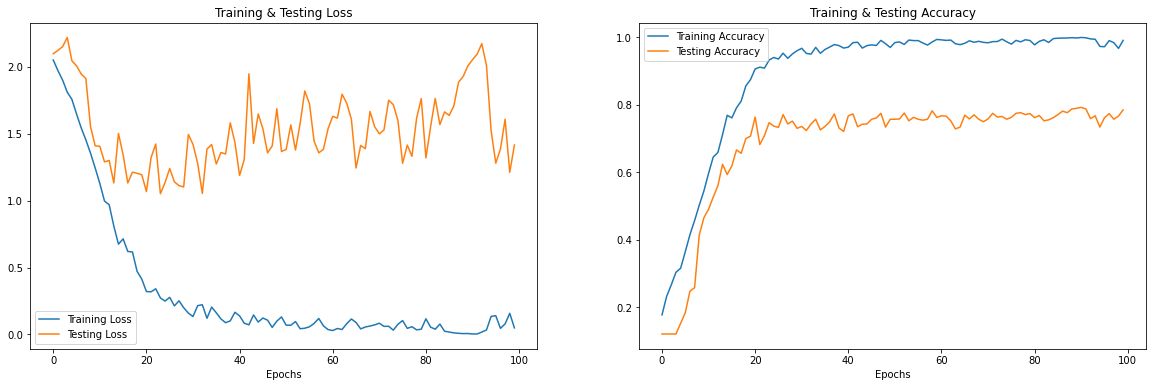

In [39]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [35]:
# predicting on test data.
pred_test = model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)
y_test1 = encoder.inverse_transform(y_test)

# Check for random predictions
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test1.flatten()

df.head(10)


34/34 [==============================] - 3s 61ms/step


,Predicted Labels,Actual Labels
0,Surprise,Fear
1,Neutral,Neutral
2,Surprise,Sad
3,Surprise,Neutral
4,Surprise,Fear
5,Surprise,Angry
6,Surprise,Fear
7,Angry,Fear
8,Surprise,Disgust
9,Surprise,Calm


# CLSTM Model

Another  model (CLSTM)  omnia model
_____________________________________________________

In [36]:
#Build the model

# define model
model000 = Sequential()
model000.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X.shape[1], 1)))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

          
model000.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

model000.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))
          
model000.add(LSTM(128, return_sequences=True)) 
model000.add(LSTM(128, return_sequences=True)) 
model000.add(Dropout(0.3))
model000.add(LSTM(128))
model000.add(Dropout(0.3))

model000.add(Dense(128, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(64, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(32, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(8, activation='softmax'))



model000.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 41, 1024)          6144      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 21, 1024)         0         
 1D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 21, 1024)         4096      
 hNormalization)                                                 
                                                                 
 dropout_10 (Dropout)        (None, 21, 1024)          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 21, 512)           2621952   
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 11, 512)         

In [37]:
from keras.utils.vis_utils import plot_model
plot_model( model000, show_shapes=True, show_layer_names=True, to_file='model000.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [43]:
model000.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
hist1=model000.fit(x_traincnn, y_train, batch_size=64, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
51/51 [==============================] - 7s 38ms/step - loss: 1.9652 - accuracy: 0.2475 - val_loss: 2.2000 - val_accuracy: 0.1222
Epoch 2/100
51/51 [==============================] - 1s 18ms/step - loss: 1.7490 - accuracy: 0.3389 - val_loss: 2.3732 - val_accuracy: 0.1213
Epoch 3/100
51/51 [==============================] - 1s 16ms/step - loss: 1.5696 - accuracy: 0.4130 - val_loss: 2.3100 - val_accuracy: 0.1815
Epoch 4/100
51/51 [==============================] - 1s 16ms/step - loss: 1.4100 - accuracy: 0.4735 - val_loss: 2.1797 - val_accuracy: 0.1556
Epoch 5/100
51/51 [==============================] - 1s 16ms/step - loss: 1.2915 - accuracy: 0.5105 - val_loss: 2.4256 - val_accuracy: 0.1472
Epoch 6/100
51/51 [==============================] - 1s 20ms/step - loss: 1.1409 - accuracy: 0.5636 - val_loss: 2.0737 - val_accuracy: 0.2222
Epoch 7/100
51/51 [==============================] - 1s 19ms/step - loss: 1.0337 - accuracy: 0.6062 - val_loss: 2.2416 - val_accuracy: 0.2472
Epoch 

34/34 [==============================] - 0s 6ms/step - loss: 0.8470 - accuracy: 0.8324
Accuracy of our model on test data :  83.24074149131775 %


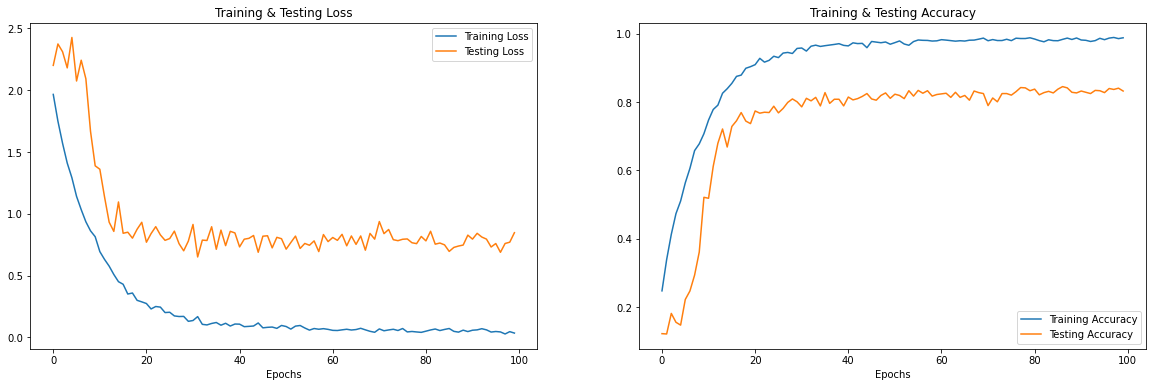

In [45]:
print("Accuracy of our model on test data : " , model000.evaluate(x_testcnn,y_test)[1]*100 , "%")
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = hist1.history['accuracy']
train_loss = hist1.history['loss']
test_acc = hist1.history['val_accuracy']
test_loss = hist1.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [46]:
# predicting on test data.
pred_test00 = model000.predict(x_testcnn)
y_pred00 = encoder.inverse_transform(pred_test)
y_test00 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred00.flatten()
df0['Actual Labels'] = y_test00.flatten()

df0.head(10)



,Predicted Labels,Actual Labels
0,Fear,Fear
1,Neutral,Neutral
2,Sad,Sad
3,Neutral,Neutral
4,Fear,Fear
5,Angry,Angry
6,Fear,Fear
7,Fear,Fear
8,Surprise,Disgust
9,Calm,Calm


# Evalutation

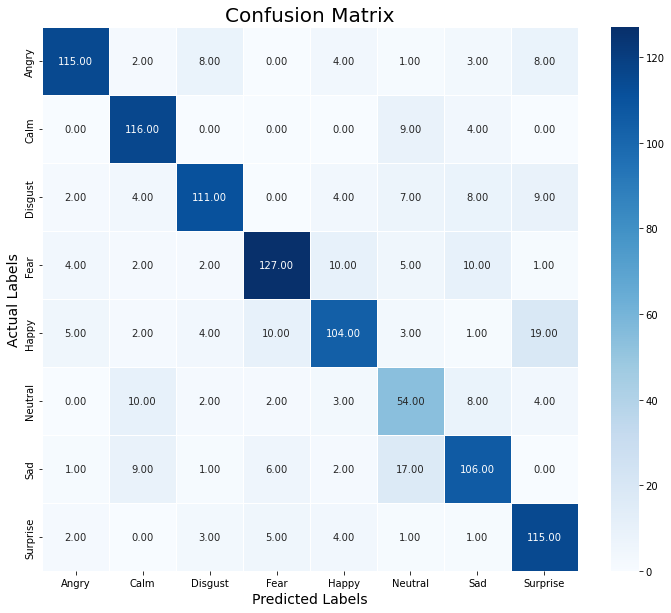

              precision    recall  f1-score   support

       Angry       0.89      0.82      0.85       141
        Calm       0.80      0.90      0.85       129
     Disgust       0.85      0.77      0.80       145
        Fear       0.85      0.79      0.82       161
       Happy       0.79      0.70      0.75       148
     Neutral       0.56      0.65      0.60        83
         Sad       0.75      0.75      0.75       142
    Surprise       0.74      0.88      0.80       131

    accuracy                           0.79      1080
   macro avg       0.78      0.78      0.78      1080
weighted avg       0.79      0.79      0.79      1080



In [47]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test00, y_pred00)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test00, y_pred00))

# Saving Best Model

In [48]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model000.to_json()
with open("cnnlstmmodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model000.save_weights("cnnlstmmodel000.h5")
print("Saved model to disk") 

Saved model to disk


In [34]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('cnnlstmmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("cnnlstmmodel000.h5")
print("Loaded model from disk")

Loaded model from disk


# Predict function
* That can predict new record 

In [36]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=feat_ext(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,41))
    i_result = scaler.transform(result)
    final_result=np.expand_dims(i_result, axis=2)
    return final_result


def feat_ext(data):
    #Time_domain_features
    # ZCR Persody features or Low level ascoustic features
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally
    #Frequency_domain_features
    #Spectral and wavelet Features
    #MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr,n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally
    return result

def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext(data_stretch_pitch)
    result = np.vstack((result, res3))
    return result

emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder.inverse_transform(predictions)
    print(y_pred[0][0]) 

In [37]:
prediction("E:/web/New folder/ATM/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav")

1/1 [==============================] - 4s 4s/step
Neutral


In [40]:
prediction("E:/web/New folder/ATM/audio_speech_actors_01-24/Actor_01/03-01-04-02-01-01-01.wav")

1/1 [==============================] - 0s 56ms/step
Sad


In [148]:
prediction("C:/Users/ttsul/OneDrive/سطح المكتب/Labs/speach/archive (8)/audio_speech_actors_01-24/Actor_01/03-01-05-01-02-02-01.wav")

1/1 [==============================] - 0s 20ms/step
Angry


In [141]:
prediction("C:/Users/ttsul/OneDrive/سطح المكتب/Labs/speach/archive (8)/audio_speech_actors_01-24/Actor_21/03-01-04-02-02-02-21.wav")

1/1 [==============================] - 0s 17ms/step
Sad


In [142]:
prediction("C:/Users/ttsul/OneDrive/سطح المكتب/Labs/speach/archive (8)/audio_speech_actors_01-24/Actor_02/03-01-06-01-02-02-02.wav")

1/1 [==============================] - 0s 17ms/step
Fear


In [143]:
prediction("C:/Users/ttsul/OneDrive/سطح المكتب/Labs/speach/archive (8)/audio_speech_actors_01-24/Actor_02/03-01-06-01-02-02-02.wav")

1/1 [==============================] - 0s 18ms/step
Fear


In [144]:
prediction("C:/Users/ttsul/Downloads/151783b6-e3bc-45ef-b1c6-4d6793f791c5-byVC.wav")

1/1 [==============================] - 0s 18ms/step
Angry


In [145]:
prediction("C:/Users/ttsul/Downloads/6f58df16-1070-4d57-a8e0-cd80535a8a97-byVC.wav")

1/1 [==============================] - 0s 17ms/step
Calm


In [150]:
prediction("C:/Users/ttsul/Downloads/OAF_back_fear.wav")

1/1 [==============================] - 0s 19ms/step
Sad


In [167]:
prediction("C:/Users/ttsul/Downloads/Nasser-Angry.wav") # ناصر القصبي معصب

1/1 [==============================] - 0s 21ms/step
Angry


In [168]:
prediction("C:/Users/ttsul/Downloads/Nasser-Sad.wav") # ناصر  القصبي زعلان

1/1 [==============================] - 0s 19ms/step
Sad


In [170]:
prediction("C:/Users/ttsul/OneDrive/سطح المكتب/Labs/speach/archive (8)/audio_speech_actors_01-24/Actor_13/03-01-03-02-01-01-13.wav")# Happy

1/1 [==============================] - 0s 21ms/step
Happy


In [172]:
prediction("C:/Users/ttsul/OneDrive/سطح المكتب/Labs/speach/archive (8)/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav")# Natural

1/1 [==============================] - 0s 18ms/step
Neutral
